In [ ]:
import numpy as np                  # Scientific computing
import matplotlib.pyplot as plt     # plot graphs
import matplotlib.lines as mlines
import sklearn.datasets
import h5py                         # work with dataset stored in H5 files
import scipy                        # use your own pictures
import math
from PIL import Image               # use your own pictures
from scipy import ndimage
from scipy.special import expit     # expit is the sigmoid function
from sklearn.metrics import log_loss

%matplotlib inline

In [ ]:
np.random.seed(7)
X1_raw, Y1_raw = sklearn.datasets.make_classification(n_samples = 100, n_features=2, 
                            n_redundant=0, n_informative=1,
                            n_clusters_per_class=1)



In [ ]:
X1 = np.transpose(X1_raw)
Y1 = Y1_raw.reshape(1, Y1_raw.shape[0])
X = np.vstack((np.ones((1,100)), X1))
Y = Y1

In [ ]:
def init_parameters(n):
  np.random.seed(2)
  # -- start of your code
  w = np.zeros(n+1)
  w= np.reshape(w,(n+1,1))

  # -- end of your code
  assert(w.shape == (n+1,1))
  return (w)

In [ ]:
def forward_pass(X, w):

  # -- start of your code
  B = np.matmul(np.transpose(w),X)
  A = scipy.special.expit(B)
  # -- end of your code
  
  assert(A.shape == (1, X.shape[1]))
  return A

In [ ]:
def calculate_loss(A,Y):

  # -- start of your code

  L = []
  for x in range(A[0].size):
   if Y[0,x] == 0 :
     L.append(-math.log(1-A[0,x]))
   else :
     L.append(-math.log(A[0,x]))

  L = np.array(L) # list to array to use reshape()
  L = L.reshape(Y.shape)
 
  # -- end of your code
  
  assert(L.shape == Y.shape)
  return L

In [ ]:
def calculate_cost(loss):

  # -- start of your code
  
  cost = np.sum(loss) / m

  # -- end of your code
  
  assert(isinstance(cost, float) or isinstance(cost, int))
  cost = np.squeeze(cost)
  assert(cost.shape == ())

  return(cost)

In [ ]:
def calculate_gradients(X, Y, A):

  # -- start of your code
  dw = np.matmul(X,np.transpose(A-Y)) / m
  # -- end of your code

  assert(dw.shape == (X.shape[0],1))
  return dw

In [ ]:
def update_parameters(w, dw, learning_rate = 0.01):

  # -- start of your code
  w_new = w - (learning_rate * dw)
  # -- end of your code

  assert(w_new.shape == w.shape)
  return w_new

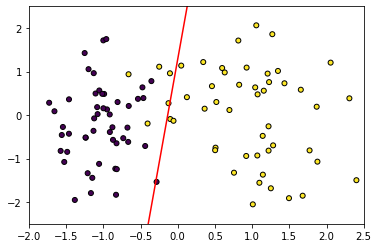

In [ ]:
# the decision boundary (determine two points on the line)
w = init_parameters(2)
xp = np.array((-2, 2.6))
yp = -(w[0] + w[1] * xp) / w[2]

# plot decision boundaries
# Visualize the data:
colors=["y", "r", "g", "b", "c", "m"]
fig, ax = plt.subplots()
ax.scatter(X1_raw[:, 0], X1_raw[:, 1], marker='o', c=Y1_raw, s=25, edgecolor='k')
plt.axis([-2, 2.5, -2.5, 2.5])
plt.plot(xp, yp,"r-")
plt.show()

In [ ]:
# dataset stored in X and Y
n = X.shape[0] - 1  # number of features
m = X.shape[1]      # number of examples/datapoints

In [ ]:
w = init_parameters(n)
print(w)

[[-0.1280102 ]
 [-0.94814754]
 [ 0.09932496]]


In [ ]:
A = forward_pass(X, w)
print(A)

[[0.22130376 0.61692888 0.24077207 0.50425574 0.35663404 0.13140113
  0.81029944 0.55390586 0.61878461 0.31539829 0.64299467 0.78654594
  0.6770538  0.14989414 0.3353656  0.11770101 0.25886383 0.32522852
  0.68200914 0.55448089 0.75283331 0.59513118 0.63300093 0.68708604
  0.20318097 0.27361418 0.62566584 0.76796188 0.37805344 0.6612072
  0.38796268 0.71004677 0.73850425 0.19540485 0.13245426 0.25006457
  0.23708639 0.12385457 0.72928925 0.33519436 0.1851564  0.12966319
  0.48964319 0.2353455  0.77054299 0.2103205  0.69004183 0.4851844
  0.77138086 0.78727538 0.21237056 0.58632846 0.72488738 0.69743062
  0.71446803 0.47830532 0.6548849  0.62651255 0.60252034 0.71669347
  0.71296953 0.51674888 0.76851629 0.16267893 0.28966579 0.72238575
  0.21345147 0.55901012 0.70235492 0.28416308 0.44923814 0.41781706
  0.34770031 0.72958199 0.78481384 0.64385511 0.072192   0.71696376
  0.70831917 0.82331186 0.30121593 0.66297626 0.2508978  0.35750572
  0.73031217 0.49730365 0.62835765 0.72902952 0.22

In [ ]:
loss = calculate_loss(A,Y)
print(loss)

[[1.50821906 0.95953462 1.42390455 0.68467172 1.03104511 2.02950055
  1.66230843 0.80722527 0.96439072 1.15391902 1.03000456 1.54433366
  1.13026953 1.89782595 1.092534   2.13960766 1.3514531  1.12322722
  1.14573263 0.58972294 1.39769232 0.90419217 1.00239596 1.16182701
  1.59365823 1.29603628 0.98260639 1.46085362 0.97271972 1.08236658
  0.94684612 1.23803565 1.34133727 1.6326817  2.0215179  1.3860361
  1.43933068 2.08864722 1.30670438 1.09304473 1.68655441 2.04281507
  0.71407835 1.44670063 1.47203961 1.55912272 1.17131792 0.72322625
  1.47569782 1.54775683 1.54942262 0.882683   1.29057474 1.19544468
  1.25340128 0.73750601 1.0638773  0.98487087 0.92261152 1.26122584
  1.24816691 0.66019825 1.46324575 1.81597677 1.23902748 1.28152272
  1.54434578 0.5815877  1.21185349 1.25820696 0.80020215 0.87271159
  1.05641434 1.30778634 1.53625178 0.44028156 2.628426   1.26218032
  1.23209513 1.73336905 1.1999279  1.08760191 1.38270961 1.0286039
  1.31049018 0.68776897 0.9898233  1.30574539 1.48

In [ ]:
cost = calculate_cost(loss)
print(cost)

1.276738770769144


In [ ]:
dw = calculate_gradients(X, Y, A)
print ("dw = " + str(dw))

dw = [[-0.00933943]
 [-0.73740725]
 [-0.05732144]]


In [ ]:
# update parameters

# Note: The size of the step is controlled by the learning_rate
learning_rate = 0.001

print("Parameters and Cost Before Update")
print("w = " + str(w))
print("Cost = " + str(cost))

w = update_parameters(w,dw, learning_rate)

print("\nParameters and Cost After Update")
print("w = " + str(w))

A = forward_pass(X, w)
loss = calculate_loss(A,Y)
cost = calculate_cost(loss)
print("Cost = " + str(cost))

Parameters and Cost Before Update
w = [[-0.1280102 ]
 [-0.94814754]
 [ 0.09932496]]
Cost = 0.07818521103562198

Parameters and Cost After Update
w = [[-0.12800715]
 [-0.94814018]
 [ 0.09932614]]
Cost = 1.2767332466564074


In [ ]:
# dataset
n = X.shape[0] - 1  # number of features
m = X.shape[1]      # number of examples/datapoints

# init parameters, set hyperparameters
w = init_parameters(n)
learning_rate = 0.01
num_iterations = 2000
costs = []


for i in range(num_iterations):
  # -- start of your code
  A = forward_pass(X, w)
  loss = calculate_loss(A,Y)
  cost = calculate_cost(loss)

  if i % 100 == 0:
    costs.append(cost)

  dw = calculate_gradients(X, Y, A)
  w = update_parameters(w,dw, learning_rate)
  # -- end of your code

  if i%100 == 0:
    print ("Cost after iteration %i: %f" %(i, cost))

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.513419
Cost after iteration 200: 0.411822
Cost after iteration 300: 0.349010
Cost after iteration 400: 0.306892
Cost after iteration 500: 0.276795
Cost after iteration 600: 0.254215
Cost after iteration 700: 0.236623
Cost after iteration 800: 0.222501
Cost after iteration 900: 0.210889
Cost after iteration 1000: 0.201152
Cost after iteration 1100: 0.192852
Cost after iteration 1200: 0.185680
Cost after iteration 1300: 0.179410
Cost after iteration 1400: 0.173872
Cost after iteration 1500: 0.168939
Cost after iteration 1600: 0.164510
Cost after iteration 1700: 0.160508
Cost after iteration 1800: 0.156869
Cost after iteration 1900: 0.153543


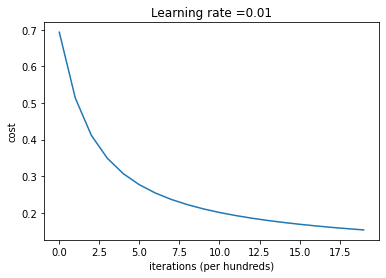

In [ ]:
# Plot learning curve (with costs)
costs = np.squeeze(costs)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()

In [ ]:
# -- start of your code
prediction = forward_pass(X, w)
prediction = (prediction >= 0.5).astype(int)
accuracy = 1 - np.mean(np.abs(Y1_raw - prediction))

# -- end of your code

print("Train accuracy: {} %".format(accuracy))

Train accuracy: 0.98 %
